# Training Logistic Regression in Cross Entropy Pytorch <br> <br>  

In [1]:
import torch as pt
import torch.nn as nn
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Dataset:

In [2]:
from torch.utils.data import DataLoader,Dataset
sig= nn.Sigmoid()

In [3]:
class Data(Dataset):
    def __init__(self):
        self.x=pt.arange(-2,2,0.1).view(-1,1)
        self.f=-3*self.x+1+0.45*pt.randn(self.x.size())
        self.y=sig(self.f)
                
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return len(self.x)

Looking at dataset:

Text(0.5,1,'Dataset')

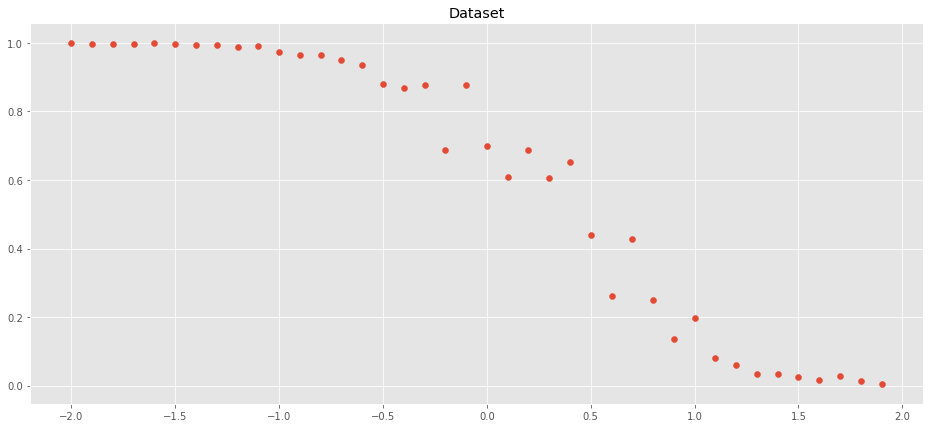

In [4]:
dataset= Data()
plt.figure(figsize=(16,7))
plt.scatter(dataset.x.numpy(),dataset.y.numpy())
plt.title('Dataset')

### Trainloader:

In [5]:
trainloader= DataLoader(dataset=dataset,batch_size=1)

## Defining the Objective Function:
$$ \Large g(w,b)= -\frac{1}{N}\sum_{n=1}^N y_n ln(\sigma(wx_n+b))+(1-y_n)ln(1-\sigma(wx_n+b)) $$ Where: <br> 
$\large y_n:\epsilon[0,1]$ 

In [6]:
criterion= nn.BCELoss()

Remember just in case:<br>
**Mean Square Error:**`nn.MSELoss()`

## Defining the model:

In [7]:
model=nn.Sequential(nn.Linear(1,1),nn.Sigmoid())
list(model.parameters())

[Parameter containing:
 tensor([[-0.5522]], requires_grad=True), Parameter containing:
 tensor([-0.5765], requires_grad=True)]

Executing the program:

In [8]:
LOSS=[]
optimizer= pt.optim.SGD(model.parameters(),lr=0.01)
for epoch in range(500):
    for x,y in trainloader:
        sigma=model(x)
        loss=criterion(sigma,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    LOSS.append(float(loss))

Text(0,0.5,'loss')

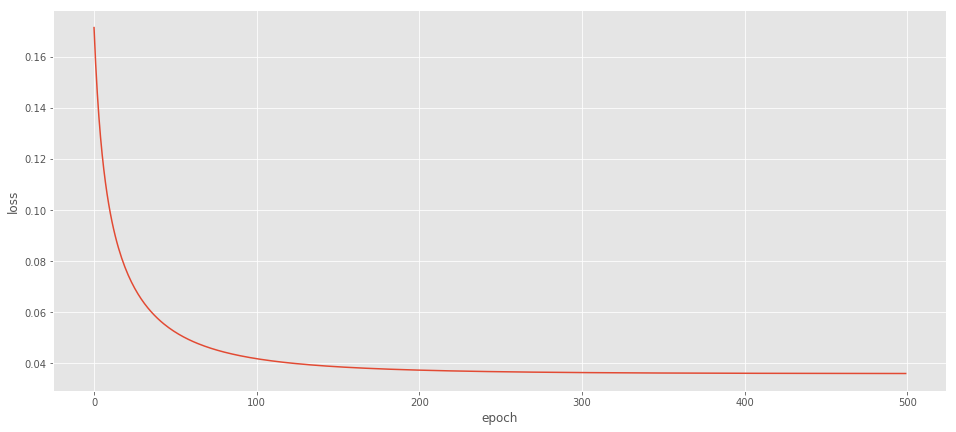

In [9]:
plt.figure(figsize=(16,7))
plt.plot(LOSS)
plt.xlabel('epoch')
plt.ylabel('loss')

- It shows **a slow convergence** but converges

In [10]:
list(model.parameters())

[Parameter containing:
 tensor([[-2.7979]], requires_grad=True), Parameter containing:
 tensor([1.0438], requires_grad=True)]

In [11]:
len(trainloader)
    

40